In [80]:
import dill
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [3]:
transcripts = dill.load(open('../dills/debate_transcripts_list.dill', 'r'))

In [129]:
speakers = []# flattened dict of all candidates and their statements
statements = []
# all_statements = [] # list of all statements
for debate in transcripts:
    for speaker in debate:
        statement = ''.join(debate[speaker])
        
        # filter out questions and people who didn't talk much
        if len(statement) > 20000 and len(speaker) > 7:
            speakers.append(speaker)
            statements.append(statement)

In [142]:
tfidf = TfidfVectorizer(ngram_range=(1,3), stop_words='english', min_df=2, max_df=0.8)

In [111]:
import pandas as pd

In [130]:
df = pd.DataFrame(statements, speakers)

In [131]:
df

,0
CLINTON_2016,"Well, I'm happy to be here in New Hampshire f..."
SANDERS_2016,"Rachel, thank you very much.Millions of Ameri..."
CLINTON_2016,"Well, good evening. And I want to thank the C..."
SANDERS_2016,Thank you. As we honor the extraordinary life...
CLINTON_2016,"Well, thank you. And I'm delighted to be here..."
SANDERS_2016,Good evening.I am running for president of th...
MALLEY_2016,"Martha, thank you. Tonight we have a differen..."
CLINTON_2015,"Well, our prayers are with the people of Fran..."
SANDERS_2015,"Well, John, let me concur with you and with a..."
CLINTON_2015,"Well, thank you, and thanks to everyone for h..."


In [143]:
# fit on list of all statements
tfidf_statements = tfidf.fit_transform(df[0].values)

In [26]:
from sklearn.cluster import KMeans

In [144]:
kmeans = KMeans(n_clusters=3, n_init=100)

In [145]:
clusters = kmeans.fit_transform(tfidf_statements)

In [146]:
labels = kmeans.predict(tfidf_statements)

In [147]:
zip(speakers, labels.tolist())

[(u'CLINTON_2016', 1),
 (u'SANDERS_2016', 1),
 (u'CLINTON_2016', 1),
 (u'SANDERS_2016', 1),
 (u'CLINTON_2016', 1),
 (u'SANDERS_2016', 1),
 (u'MALLEY_2016', 1),
 (u'CLINTON_2015', 1),
 (u'SANDERS_2015', 1),
 (u'CLINTON_2015', 1),
 (u'SANDERS_2015', 1),
 (u'COOPER_2015', 1),
 (u'RUBIO_2016', 1),
 (u'GRAHAM_2015', 1),
 (u'RYAN_2012', 1),
 (u'BIDEN_2012', 0),
 (u'SANTORUM_2012', 0),
 (u'ROMNEY_2012', 0),
 (u'GINGRICH_2012', 0),
 (u'SANTORUM_2012', 0),
 (u'ROMNEY_2012', 0),
 (u'GINGRICH_2012', 0),
 (u'ROMNEY_2012', 0),
 (u'ROMNEY_2012', 0),
 (u'ROMNEY_2012', 1),
 (u'MODERATOR_2012', 0),
 (u'ROMNEY_2012', 0),
 (u'ROMNEY_2011', 0),
 (u'ROMNEY_2011', 1),
 (u'KING_2011', 0),
 (u'OBAMA_2011', 1),
 (u'MCCAIN_2011', 1),
 (u'OBAMA_2011', 1),
 (u'MCCAIN_2011', 1),
 (u'OBAMA_2011', 1),
 (u'MCCAIN_2011', 1),
 (u'PALIN_2011', 1),
 (u'BIDEN_2011', 1),
 (u'CLINTON_2008', 1),
 (u'OBAMA_2008', 1),
 (u'OBAMA_2008', 1),
 (u'CLINTON_2008', 1),
 (u'CLINTON_2008', 1),
 (u'OBAMA_2008', 1),
 (u'CLINTON_2008', 1),

In [69]:
import matplotlib.pyplot as plt

In [78]:
%matplotlib inline

(array([ 16.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,  35.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

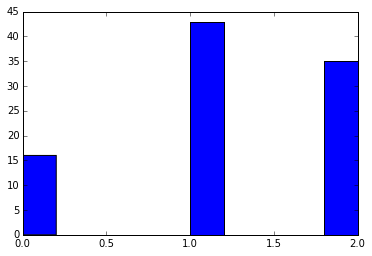

In [148]:
plt.hist(labels)